In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

#Initial conditions
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = 100.0
T0[:, 0] = 100.0

In [4]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I, J = int(nx / 2), int(ny / 2)  # indices of the center
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
        T[0, :] = 100.0 #Bottom
        T[:, 0] = 100.0 #Left
        # Apply Neumann conditions (zero-gradient).
        T[-1, :] = T[-2, :] #Top
        T[:, -1] = T[:, -2] #Right
        # Check if the center of the domain has reached T = 70C.
        if T[J, I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T

In [12]:
sigma = 0.5
dt = sigma / (alpha * (1 / dx**2 + 1 / dy**2))
nt = 500

In [13]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

[time step 256] Center at T=70.02 at t=0.16 s


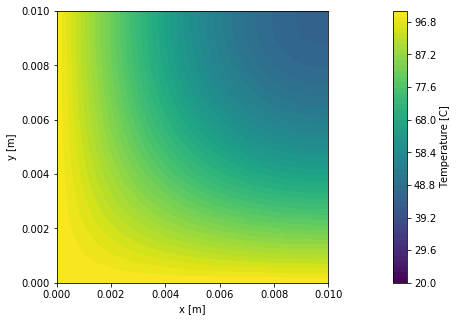

In [14]:
# Plot the filled contour of the temperature.
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');